In [162]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from datetime import date, timedelta
from sklearn.impute import SimpleImputer
import scipy.optimize as op
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
csv_path = os.path.join('..','data','data_weather_cleaned.csv')

In [164]:
df = pd.read_csv(csv_path)

In [165]:
df

,date,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos
0,2010-01-01 00:00:00,7510.0,44.830667,-0.691333,47.0,99050.0,230.0,9.8,9.6,81.0,0.0,0,98410.0,-0.766044,-6.427876e-01
1,2010-01-01 03:00:00,7510.0,44.830667,-0.691333,47.0,99160.0,250.0,11.8,8.7,87.0,0.0,0,98520.0,-0.939693,-3.420201e-01
2,2010-01-01 06:00:00,7510.0,44.830667,-0.691333,47.0,99570.0,290.0,5.1,7.6,91.0,0.0,0,98920.0,-0.939693,3.420201e-01
3,2010-01-01 09:00:00,7510.0,44.830667,-0.691333,47.0,99990.0,310.0,5.7,6.8,92.0,0.0,0,99340.0,-0.766044,6.427876e-01
4,2010-01-01 12:00:00,7510.0,44.830667,-0.691333,47.0,100350.0,310.0,6.2,6.6,82.0,0.0,0,99690.0,-0.766044,6.427876e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505852,2021-07-31 09:00:00,7650.0,43.437667,5.216000,9.0,100920.0,310.0,3.2,27.2,58.0,0.0,0,100560.0,-0.766044,6.427876e-01
505853,2021-07-31 12:00:00,7650.0,43.437667,5.216000,9.0,100770.0,270.0,6.1,30.6,49.0,0.0,0,100410.0,-1.000000,-1.836970e-16
505854,2021-07-31 15:00:00,7650.0,43.437667,5.216000,9.0,100680.0,310.0,8.2,30.0,40.0,0.0,0,100320.0,-0.766044,6.427876e-01
505855,2021-07-31 18:00:00,7650.0,43.437667,5.216000,9.0,100750.0,320.0,8.0,27.9,45.0,0.0,0,100390.0,-0.642788,7.660444e-01


In [166]:
df_7577 = df[df['numer_sta'] == 7577.0]
df_7577

,date,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos
370914,2010-01-01 00:00:00,7577.0,44.581167,4.733,73.0,99050.0,360.0,2.1,7.3,96.0,0.0,0,98170.0,-2.449294e-16,1.000000
370915,2010-01-01 03:00:00,7577.0,44.581167,4.733,73.0,98790.0,350.0,5.1,7.7,94.0,0.0,0,97910.0,-1.736482e-01,0.984808
370916,2010-01-01 06:00:00,7577.0,44.581167,4.733,73.0,98840.0,50.0,1.5,7.5,95.0,0.0,1,97960.0,7.660444e-01,0.642788
370917,2010-01-01 09:00:00,7577.0,44.581167,4.733,73.0,99230.0,240.0,1.0,7.6,94.0,0.0,0,98350.0,-8.660254e-01,-0.500000
370918,2010-01-01 12:00:00,7577.0,44.581167,4.733,73.0,99410.0,160.0,0.5,8.3,95.0,0.0,0,98530.0,3.420201e-01,-0.939693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404684,2021-07-31 09:00:00,7577.0,44.581167,4.733,73.0,101130.0,10.0,5.0,20.8,74.0,0.0,0,100270.0,1.736482e-01,0.984808
404685,2021-07-31 12:00:00,7577.0,44.581167,4.733,73.0,101020.0,20.0,5.3,23.4,62.0,0.0,0,100170.0,3.420201e-01,0.939693
404686,2021-07-31 15:00:00,7577.0,44.581167,4.733,73.0,100890.0,20.0,5.3,24.2,61.0,0.0,0,100040.0,3.420201e-01,0.939693
404687,2021-07-31 18:00:00,7577.0,44.581167,4.733,73.0,101080.0,20.0,3.7,20.4,74.0,0.0,0,100220.0,3.420201e-01,0.939693


In [167]:
df_7577 = df_7577.drop_duplicates()
df_7577

,date,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos
370914,2010-01-01 00:00:00,7577.0,44.581167,4.733,73.0,99050.0,360.0,2.1,7.3,96.0,0.0,0,98170.0,-2.449294e-16,1.000000
370915,2010-01-01 03:00:00,7577.0,44.581167,4.733,73.0,98790.0,350.0,5.1,7.7,94.0,0.0,0,97910.0,-1.736482e-01,0.984808
370916,2010-01-01 06:00:00,7577.0,44.581167,4.733,73.0,98840.0,50.0,1.5,7.5,95.0,0.0,1,97960.0,7.660444e-01,0.642788
370917,2010-01-01 09:00:00,7577.0,44.581167,4.733,73.0,99230.0,240.0,1.0,7.6,94.0,0.0,0,98350.0,-8.660254e-01,-0.500000
370918,2010-01-01 12:00:00,7577.0,44.581167,4.733,73.0,99410.0,160.0,0.5,8.3,95.0,0.0,0,98530.0,3.420201e-01,-0.939693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404684,2021-07-31 09:00:00,7577.0,44.581167,4.733,73.0,101130.0,10.0,5.0,20.8,74.0,0.0,0,100270.0,1.736482e-01,0.984808
404685,2021-07-31 12:00:00,7577.0,44.581167,4.733,73.0,101020.0,20.0,5.3,23.4,62.0,0.0,0,100170.0,3.420201e-01,0.939693
404686,2021-07-31 15:00:00,7577.0,44.581167,4.733,73.0,100890.0,20.0,5.3,24.2,61.0,0.0,0,100040.0,3.420201e-01,0.939693
404687,2021-07-31 18:00:00,7577.0,44.581167,4.733,73.0,101080.0,20.0,3.7,20.4,74.0,0.0,0,100220.0,3.420201e-01,0.939693


In [168]:
df_7577['date'] = pd.to_datetime(df_7577['date'])
#df_t = df_7577.set_index('date')[['t']]
df_7577.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33769 entries, 370914 to 404688
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       33769 non-null  datetime64[ns]
 1   numer_sta  33769 non-null  float64       
 2   Latitude   33769 non-null  float64       
 3   Longitude  33769 non-null  float64       
 4   Altitude   33769 non-null  float64       
 5   pmer       33769 non-null  float64       
 6   dd         33769 non-null  float64       
 7   ff         33769 non-null  float64       
 8   t          33769 non-null  float64       
 9   u          33769 non-null  float64       
 10  ssfrai     33769 non-null  float64       
 11  rr3        33769 non-null  int64         
 12  pres       33768 non-null  float64       
 13  dd_sin     33769 non-null  float64       
 14  dd_cos     33769 non-null  float64       
dtypes: datetime64[ns](1), float64(13), int64(1)
memory usage: 4.1 MB


<ipython-input-168-682215541f3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7577['date'] = pd.to_datetime(df_7577['date'])


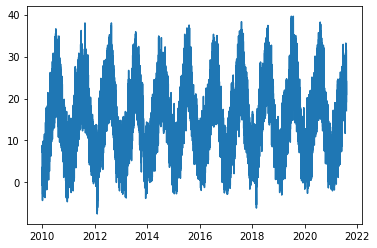

In [169]:
plt.plot(df_7577.date, df_7577.t)

In [170]:
start_date = pd.to_datetime("2010-01-01 00:00:00")
end_date = pd.to_datetime("2021-07-31 21:00:00") #Excluding last

#List of all dates
all_date = pd.date_range(start_date, end_date, freq='3H')

#Left join your main data on dates data
all_date_df = pd.DataFrame({'date':all_date})
all_date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33840 entries, 0 to 33839
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    33840 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 264.5 KB


In [171]:
(33840 - 33769)/8

8.875

In [172]:
# len(list(set(df_7577["date"]) - set(all_date_df["date"])))
# len(list(set(df_7577["date"]) ^ set(all_date_df["date"])))
df_f = pd.merge(df_7577, all_date_df, how="outer", on="date")

In [173]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33840 entries, 0 to 33839
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       33840 non-null  datetime64[ns]
 1   numer_sta  33769 non-null  float64       
 2   Latitude   33769 non-null  float64       
 3   Longitude  33769 non-null  float64       
 4   Altitude   33769 non-null  float64       
 5   pmer       33769 non-null  float64       
 6   dd         33769 non-null  float64       
 7   ff         33769 non-null  float64       
 8   t          33769 non-null  float64       
 9   u          33769 non-null  float64       
 10  ssfrai     33769 non-null  float64       
 11  rr3        33769 non-null  float64       
 12  pres       33768 non-null  float64       
 13  dd_sin     33769 non-null  float64       
 14  dd_cos     33769 non-null  float64       
dtypes: datetime64[ns](1), float64(14)
memory usage: 4.1 MB


In [174]:
df_f.isnull().sum().sort_values(ascending=False)

pres         72
numer_sta    71
Latitude     71
Longitude    71
Altitude     71
pmer         71
dd           71
ff           71
t            71
u            71
ssfrai       71
rr3          71
dd_sin       71
dd_cos       71
date          0
dtype: int64

In [175]:
imputer = SimpleImputer(strategy="mean")
imputer.fit(df_f[['t']])

SimpleImputer()

In [176]:
df_f['t'] = imputer.transform(df_f[['t']])

In [177]:
df_f.isnull().sum().sort_values(ascending=False)

pres         72
numer_sta    71
Latitude     71
Longitude    71
Altitude     71
pmer         71
dd           71
ff           71
u            71
ssfrai       71
rr3          71
dd_sin       71
dd_cos       71
date          0
t             0
dtype: int64

In [178]:
df_f.reset_index(drop=True)

,date,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos
0,2010-01-01 00:00:00,7577.0,44.581167,4.733,73.0,99050.0,360.0,2.1,7.300000,96.0,0.0,0.0,98170.0,-2.449294e-16,1.000000
1,2010-01-01 03:00:00,7577.0,44.581167,4.733,73.0,98790.0,350.0,5.1,7.700000,94.0,0.0,0.0,97910.0,-1.736482e-01,0.984808
2,2010-01-01 06:00:00,7577.0,44.581167,4.733,73.0,98840.0,50.0,1.5,7.500000,95.0,0.0,1.0,97960.0,7.660444e-01,0.642788
3,2010-01-01 09:00:00,7577.0,44.581167,4.733,73.0,99230.0,240.0,1.0,7.600000,94.0,0.0,0.0,98350.0,-8.660254e-01,-0.500000
4,2010-01-01 12:00:00,7577.0,44.581167,4.733,73.0,99410.0,160.0,0.5,8.300000,95.0,0.0,0.0,98530.0,3.420201e-01,-0.939693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33835,2020-06-27 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.365243,NaN,NaN,NaN,NaN,NaN,NaN
33836,2020-12-05 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.365243,NaN,NaN,NaN,NaN,NaN,NaN
33837,2020-12-09 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.365243,NaN,NaN,NaN,NaN,NaN,NaN
33838,2021-01-16 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.365243,NaN,NaN,NaN,NaN,NaN,NaN


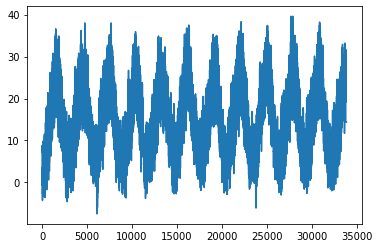

In [179]:
plt.plot(df_f.index, df_f.t)

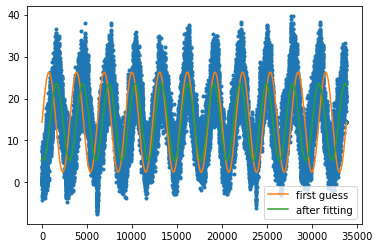

In [180]:
def my_fit(t, data, guess_freq):

    guess_mean = np.mean(data)
    guess_std = 3*np.std(data)/(2**0.5)/(2**0.5)
    guess_phase = 0
    #guess_freq = 11
    guess_amp = 1

    data_first_guess = guess_std*np.sin(guess_freq*2*np.pi*t/len(t)+guess_phase) + guess_mean

    optimize_func = lambda x: x[0]*np.sin(x[1]*2*np.pi*t/len(t)+x[2]) + x[3] - data
    est_amp, est_freq, est_phase, est_mean = op.leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]
    return (est_amp*np.sin(est_freq*2*np.pi*t/len(t)+est_phase)+est_mean), data_first_guess

t = df_f.index
data = df_f['t']
data_fit, data_first=my_fit(t, data, 11)

plt.plot(t, data, '.')
plt.plot(t, data_first, label='first guess')
plt.plot(t, data_fit, label='after fitting')
plt.legend()
plt.show()

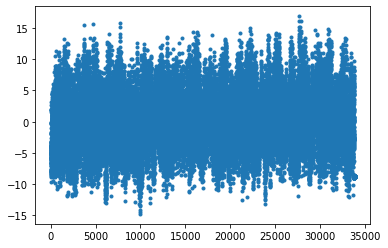

In [181]:
df_f["unyearly"] = data - data_fit
plt.plot(t, df_f["unyearly"], '.')
plt.show()

In [182]:
df_f = df_f.set_index('date')
df_f = df_f.asfreq(freq='3H')

In [183]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32267 entries, 2010-01-01 00:00:00 to 2021-01-16 06:00:00
Freq: 3H
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   numer_sta  32196 non-null  float64
 1   Latitude   32196 non-null  float64
 2   Longitude  32196 non-null  float64
 3   Altitude   32196 non-null  float64
 4   pmer       32196 non-null  float64
 5   dd         32196 non-null  float64
 6   ff         32196 non-null  float64
 7   t          32267 non-null  float64
 8   u          32196 non-null  float64
 9   ssfrai     32196 non-null  float64
 10  rr3        32196 non-null  float64
 11  pres       32195 non-null  float64
 12  dd_sin     32196 non-null  float64
 13  dd_cos     32196 non-null  float64
 14  unyearly   32267 non-null  float64
dtypes: float64(15)
memory usage: 3.9 MB


In [184]:
total_slot = 8 * 15
serie = df_f["unyearly"]
min_slot = len(serie) - total_slot
max_slot = len(serie)
df_slot = df_f[min_slot:max_slot]

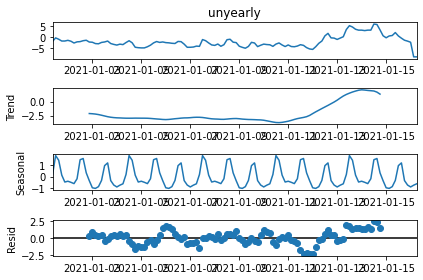

In [185]:
result_add = seasonal_decompose(df_slot["unyearly"], model='additive')
result_add.plot();

In [186]:
print('unyearly: ', adfuller(df_slot["unyearly"])[1])
print('additive resid: ', adfuller(result_add.resid.dropna())[1])
#print('multipl resid: ', adfuller(result_mul.resid.dropna())[1])

unyearly:  0.004463176343770116
additive resid:  0.06673356112932985


/Users/jonathan/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


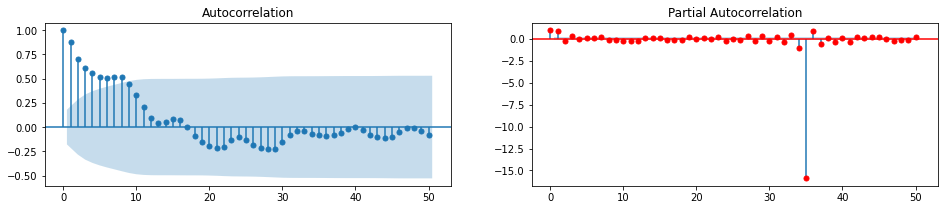

In [187]:
fig, axes = plt.subplots(1,2, figsize=(16,3))
plot_acf(df_slot["unyearly"], lags=50, ax=axes[0]);
plot_pacf(df_slot["unyearly"], lags=50, ax=axes[1], color='r');

In [188]:
df_deseasonal = df_slot["unyearly"] - result_add.seasonal 


/Users/jonathan/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


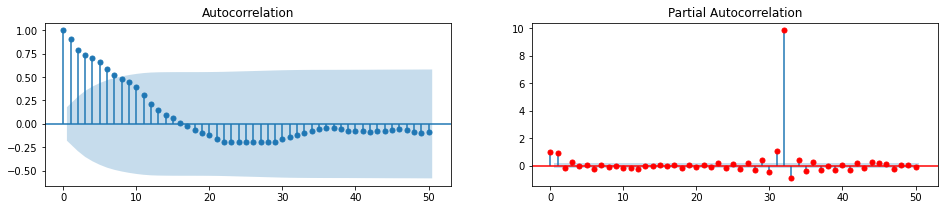

In [189]:
fig, axes = plt.subplots(1,2, figsize=(16,3))
plot_acf(df_deseasonal, lags=50, ax=axes[0]);
plot_pacf(df_deseasonal, lags=50, ax=axes[1], color='r');

<AxesSubplot:xlabel='date'>

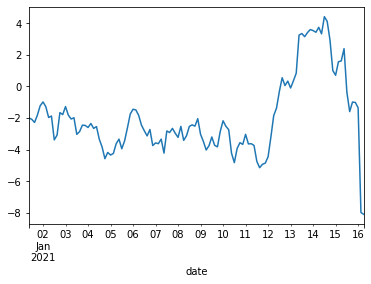

In [190]:
df_deseasonal.plot()

In [191]:
ndiffs(df_deseasonal)

1

In [192]:
df_diff = df_deseasonal.diff()

<AxesSubplot:xlabel='date'>

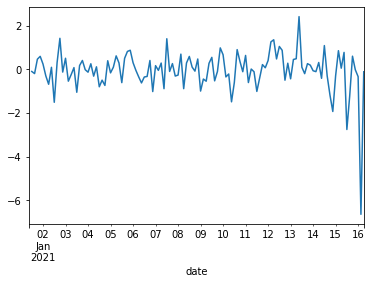

In [193]:
df_diff.plot()

In [194]:
arima = ARIMA(df_deseasonal, order=(0,1,1))
arima = arima.fit()
arima.summary()

/Users/jonathan/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  119
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -159.251
Method:                       css-mle   S.D. of innovations              0.922
Date:                Wed, 08 Sep 2021   AIC                            324.501
Time:                        22:03:41   BIC                            332.838
Sample:                    01-01-2021   HQIC                           327.887
                         - 01-16-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0509      0.093     -0.549      0.583      -0.233       0.131
ma.L1.D.y      0.0972      0.091      1.069      0.285      -0.081       0.275
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          -10.2912           +0.0000j           10.2912            0.5000
-----------------------------------------------------------------------------
"""

In [195]:
smodel = pm.auto_arima(df_deseasonal,
                       start_p=1, max_p=3,
                       start_q=3, max_q=4,
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=328.786, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=323.622, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=324.528, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=324.501, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=321.987, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=326.501, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.124 seconds


/Users/jonathan/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<AxesSubplot:xlabel='date'>

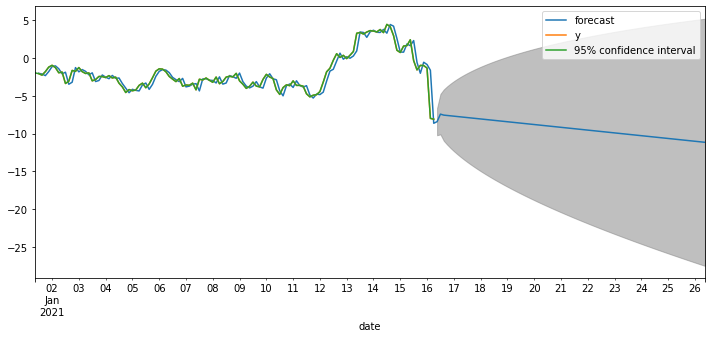

In [196]:
arima = ARIMA(df_deseasonal[:8*20], order=(0,1,3))
arima = arima.fit()
arima.summary()
arima.plot_predict(end=200);
fig = plt.gcf(); fig.set_size_inches(12, 5);
df_deseasonal.plot()

In [197]:
# Create a correct Training/Test split to predict the last 50 points
train_slot = 8*10 
train = df_deseasonal[0:train_slot]
test = df_deseasonal[train_slot:]

# Build Model
arima = ARIMA(train, order=(0, 1, 3))  
arima = arima.fit()

# Forecast
forecast, std_err, confidence_int = arima.forecast(len(test), alpha=0.05)  # 95% confidence

/Users/jonathan/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [198]:
# We define here a "Plot forecast vs. real", which also shows historical train set

def plot_forecast(fc, train, test, upper=None, lower=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);

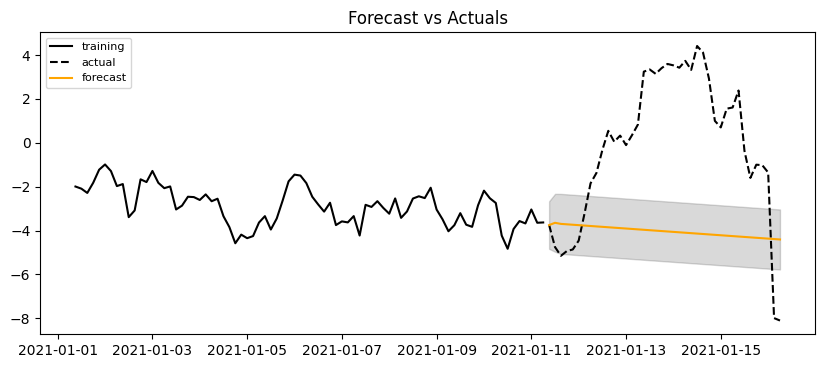

In [199]:
plot_forecast(forecast, train, test, confidence_int[:,0], confidence_int[:,1])

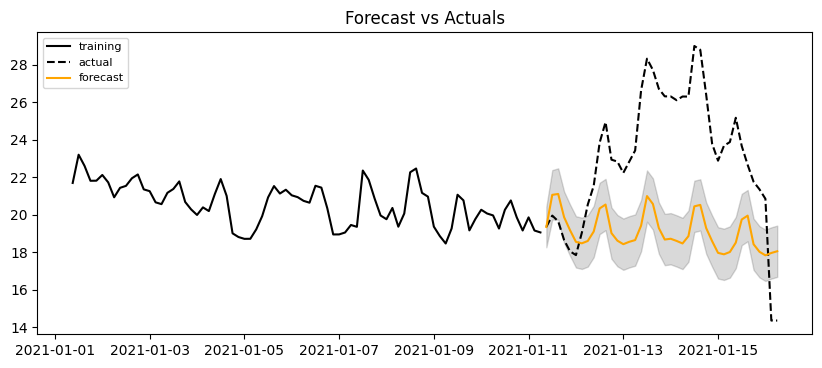

In [200]:
data_fit_slot = data_fit[len(data_fit) - total_slot:]
test_sainonal = result_add.seasonal[train_slot:] + data_fit_slot[train_slot:]
train_sainonal = result_add.seasonal[0:train_slot] + data_fit_slot[0:train_slot]

forecast_recons = forecast + test_sainonal
train_recons = train + train_sainonal
test_recons = test + test_sainonal
lower_recons = confidence_int[:,0] + test_sainonal
upper_recons = confidence_int[:,1] + test_sainonal

# plt 
plot_forecast(forecast_recons, train_recons, test_recons, lower_recons.values, upper_recons.values)